<a href="https://colab.research.google.com/github/salim928/GEN-AI/blob/adamstemp/Text_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [2]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 650.8/664.8 MB 156.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.9 MB/s eta 0:00:00
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone 

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

model_id1 = "dreamlike-art/dreamlike-photoreal-2.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"



pipe = StableDiffusionPipeline.from_pretrained(model_id1)
pipe = pipe.to("cpu")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
prompt = "A young black man with afro in suit, seated in his office in fron tpf a computer "

In [5]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt] A young black man with afro in suit, seated in his office in fron tpf a computer 


(-0.5, 767.5, 767.5, -0.5)

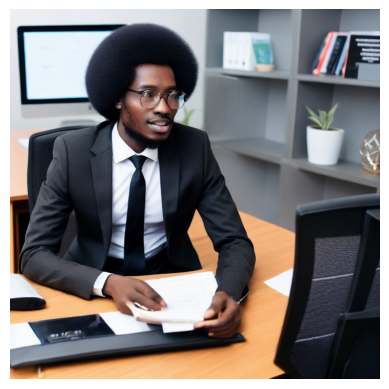

In [6]:
print("[Prompt]", prompt)
plt.imshow(image)
plt.axis('off')

In [7]:
prompt_2 = "A young ghanaian girl in the market selling bottled water with a pan on her head, while her small white tiger follows her"

In [8]:
image_2 = pipe(prompt_2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print("[Prompt]", prompt_2)
plt.imshow(image_2)
plt.axis('off')

In [9]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images[0]

  num_images = len(img)
  if num_images > 1:
    for i in range(num_images):
      plt.subplot(1, num_images, i + 1)
      plt.imshow(img[i])
      plt.axis('off')
  else:
      print("[Prompt]", prompt)
      plt.imshow(img)
      plt.axis('off')

With empty params

In [11]:
prompt_3 = "dreamlike , beautiful girl playing the festival of colors, droped in traditional indian attire, thtrowing flowers"


params = {}

In [ ]:
generate_image(pipe, prompt_3, params)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt_4 = "A data center with servers"

params = {num_images: 23}

In [ ]:
generate_image(pipe, prompt_4, params)